In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf

In [4]:
symbol = 'RELIANCE.NS'
start = '2016-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
import talib as ta


In [6]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df = df.dropna()

In [7]:
df.head()


,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist
Date,,,,,,,,,
2016-02-18,481.475006,484.350006,468.000000,470.049988,450.125458,6598322,-12.669361,-12.079159,-0.590202
2016-02-19,470.000000,476.375000,468.674988,472.174988,452.160431,4679328,-12.123162,-12.087960,-0.035203
2016-02-22,472.049988,484.149994,472.049988,481.149994,460.755005,5838396,-10.871466,-11.844661,0.973195
2016-02-23,481.549988,483.600006,471.375000,474.825012,454.698120,8681492,-10.250072,-11.525743,1.275672
2016-02-24,472.450012,479.274994,471.000000,476.325012,456.134521,6942622,-9.531829,-11.126960,1.595131


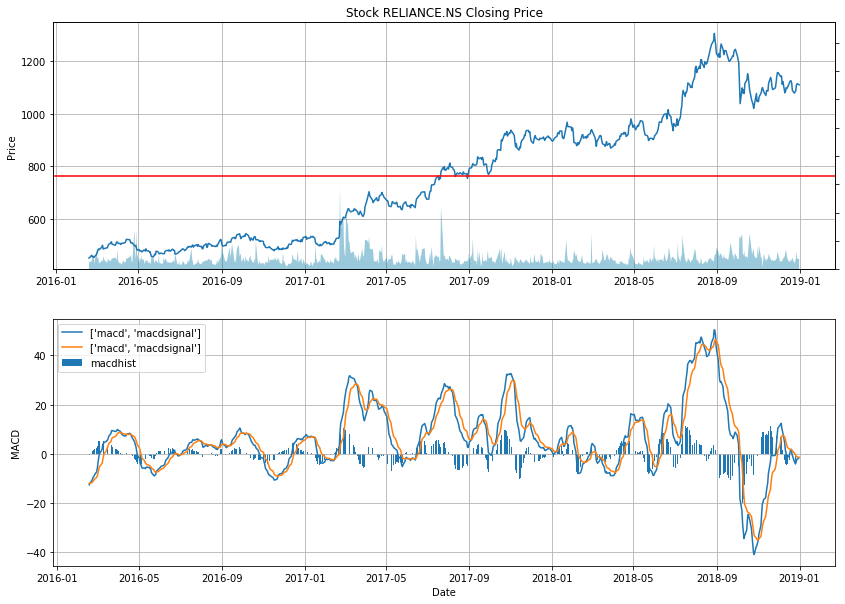

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

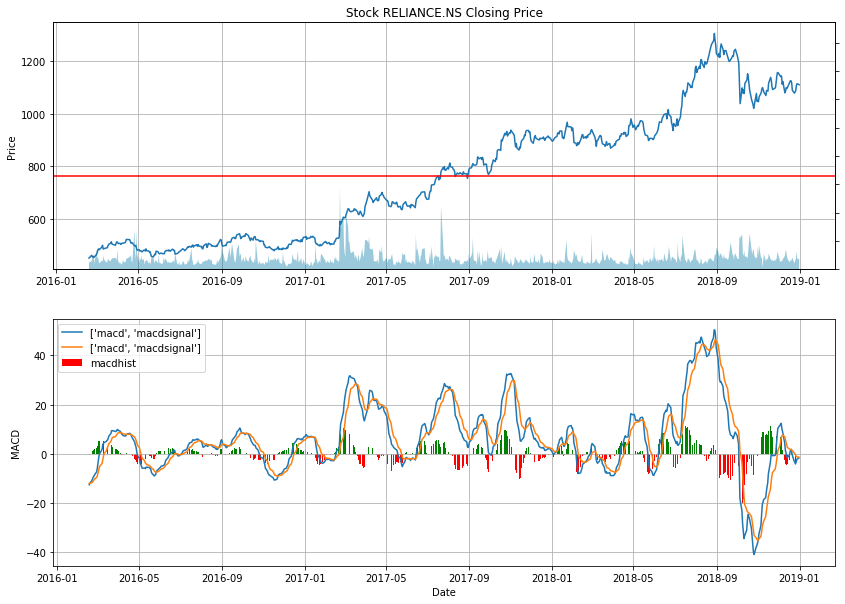

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')